# #1 Translate text into spoken translations with Amazon Translate and Amazon Polly


This module shows how to use Amazon Translate to translate text between languages. Then, you convert that text into speech with Amazon Polly. 

## Outline of Module #1

* Project introduction
* Machine learning use cases
* Amazon Services in this solution
* When you're done 

## Project introduction 

Picture this: you are a software engineer at a business that develops translation-based apps. Customers use your apps when traveling to a foreign country. Imagine you have a customer  who needs to go on an international business trip to France. With no prior knowledge of the language, he has to navigate the foreign country. 

Your customer immediately faces language barriers. He meets a representative from a business he wants to work with. He speaks English and she only understands French. Without a translator, the two representatives can't have a conversation in real-time. 


## Machine learning use cases

You will learn how to use machine learning (ML) to solve this problem of translation. The goal is to create a product that first translates text into English, and then speaks it out loud. ML is useful for solving this problem because it automates the process of translation without explicitly building a computer program to do this. 

Natural Language Processing (NLP) is a field in machine learning where computers process human language in both spoken and written forms. Two techniques within NLP are machine translation and text-to-speech. 

**Machine Translation** is a technique that uses machine learning models to automatically convert input text in one language into another language. In this project's case, you will translate words given in French into English. 
    
**Text-to-speech** is a technique that uses machine learning models to automatically convert text into spoken words that sound natural. In this case, you want to take our translated French text and convert it into a sound file. 

# Amazon Services in this solution

### Amazon Translate

Amazon Translate is a neural machine translation service that delivers fast and customizable language translation. It  automates translation tasks such as localizing content for different geographic locations and translating large volumes of text for analysis. 

In this module, you use Amazon Translate to translate text input from French into English.


### Amazon Polly

Amazon Polly is a service that can convert text input into speech. Polly is used to create interactive service bots for customer service purposes and automatically narrate written text. 

In this module, you use Amazon Polly to process the translated English output and convert the text into an audio file. 

## Before you begin

Each of the Jupyter notebooks in this repository requires an _execution role_. An execution role is the role that gives SageMaker permission to perform operations on your behalf. You will use Amazon Translate and Amazon Polly in this notebook. You will need to give our role permission to access the services you want to use. For more information about IAM identities, see [the IAM User Guide](https://docs.aws.amazon.com/IAM/latest/UserGuide/id.html).

In order to set up your role policies, complete the following steps:

1. On the [Amazon SageMaker console](https://console.aws.amazon.com/sagemaker), choose this choose the notebook instance that you created to launch this module. 

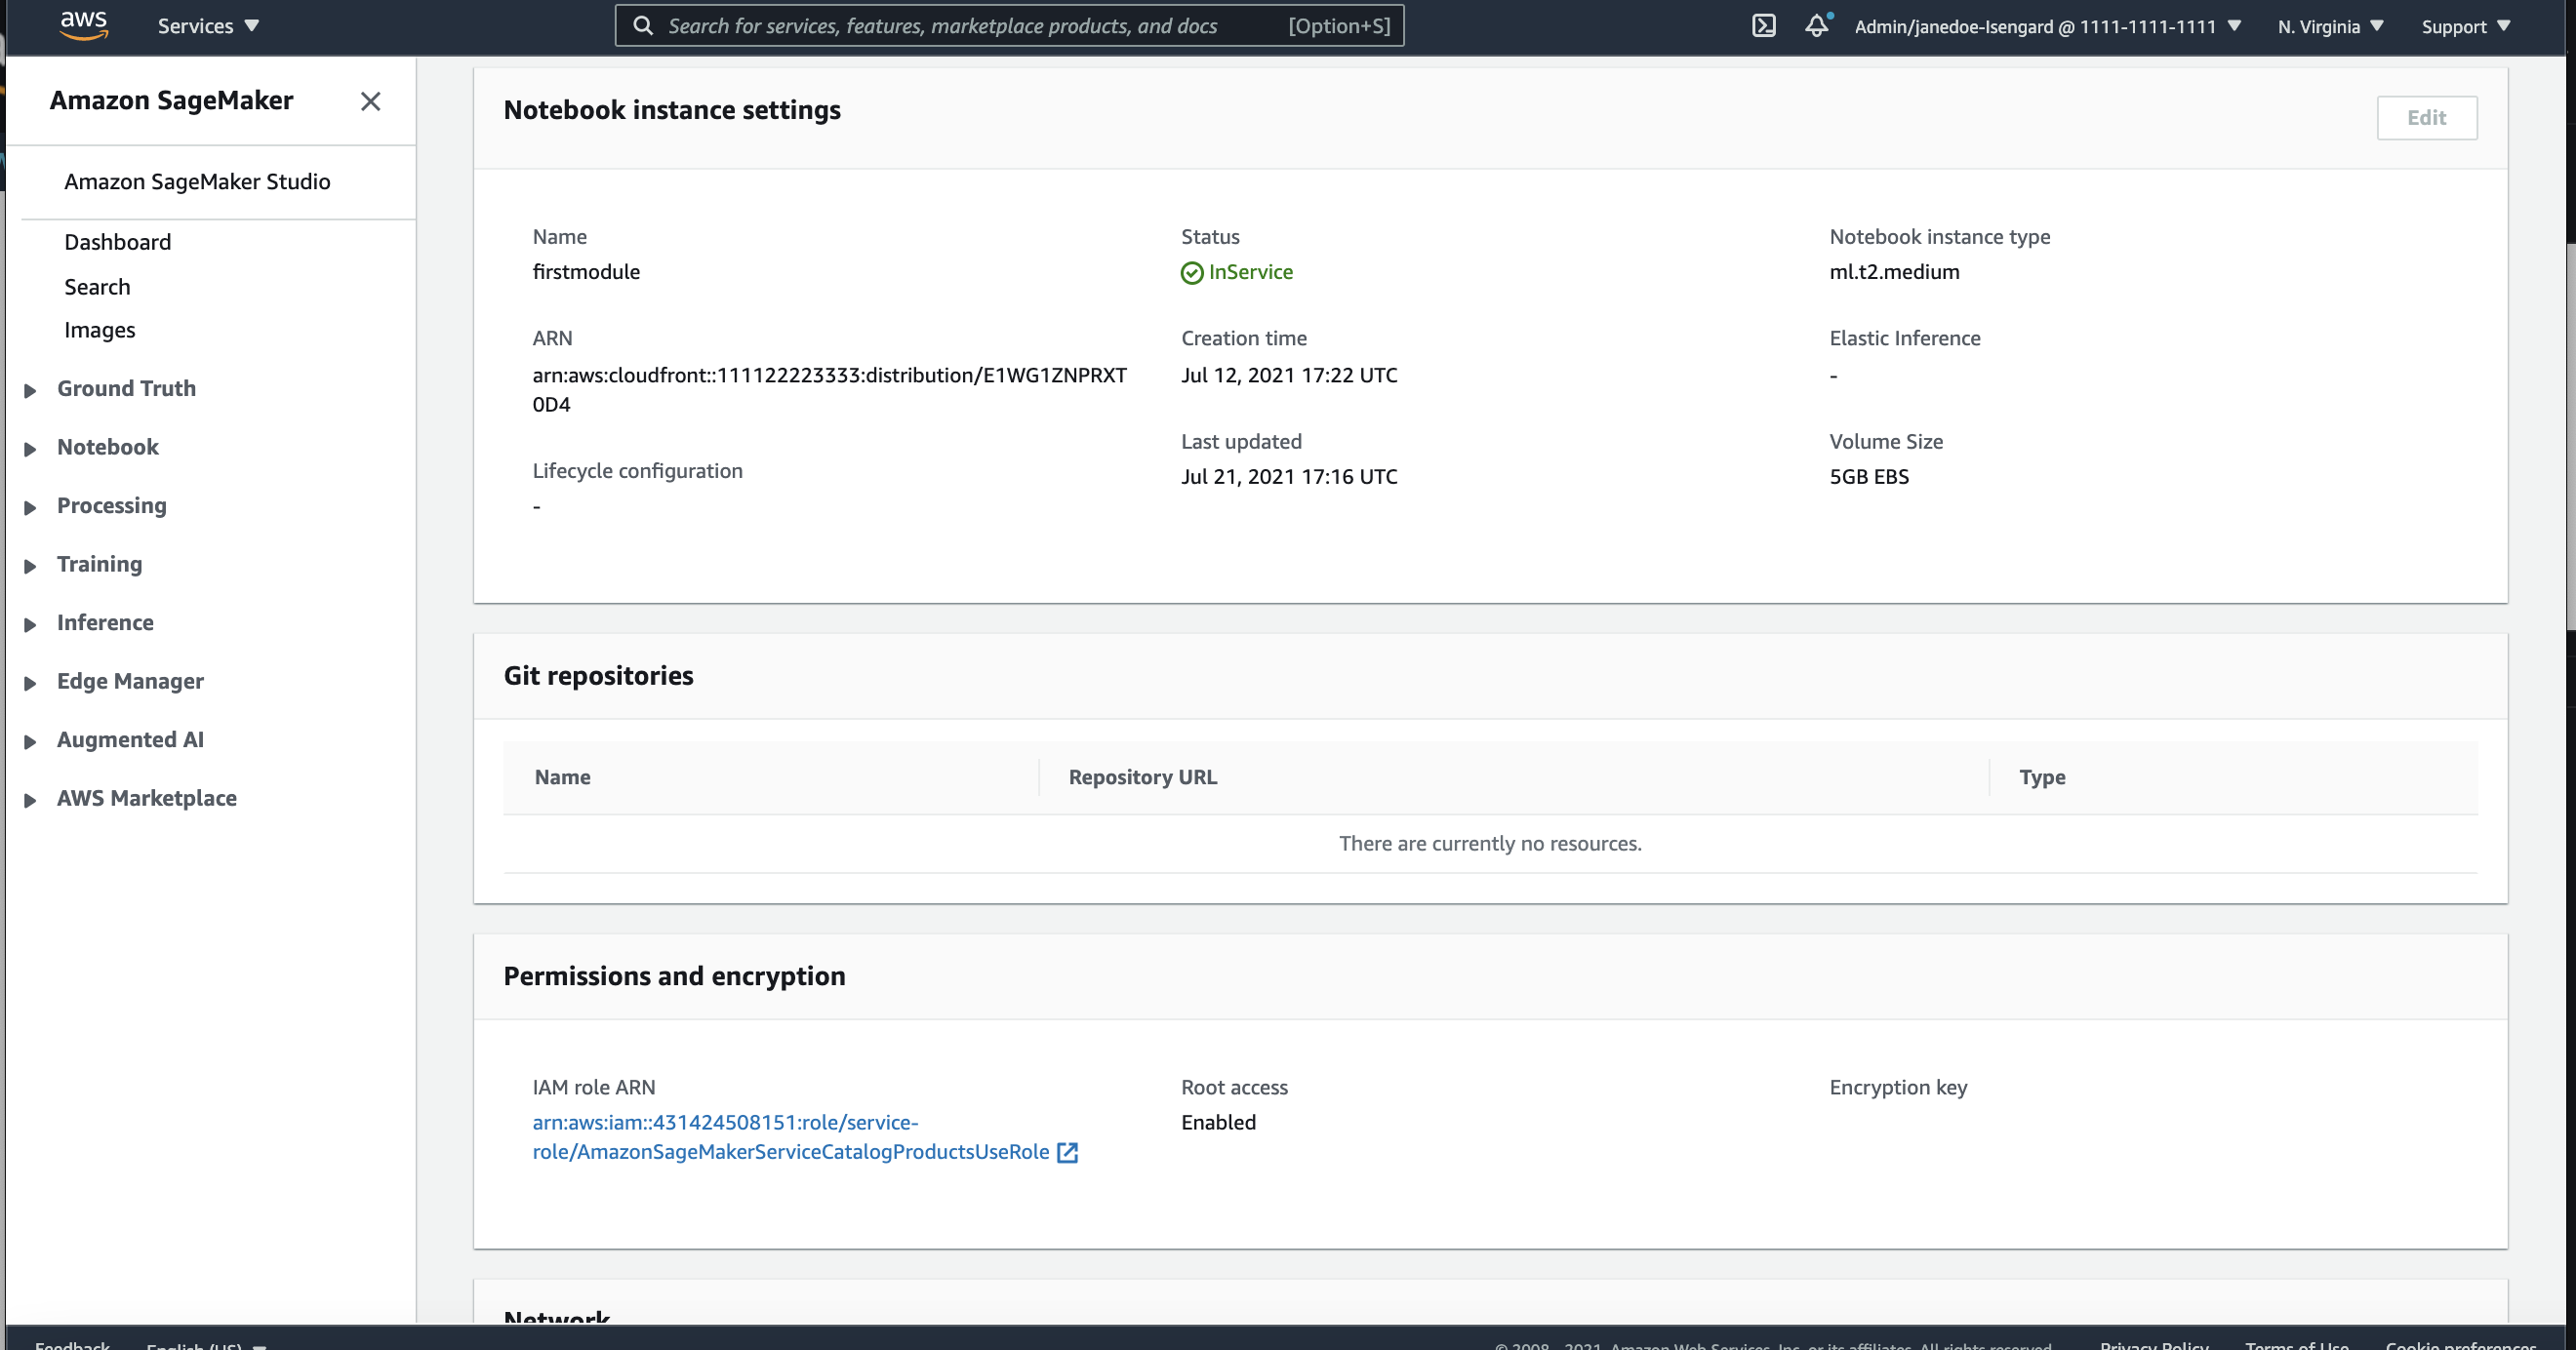

2. Scroll to **Permissions and encryption** and choose the IAM role ARN hyperlink. 
3. Choose **Attach policies.** 
4. Search up and select the policies "TranslateFullAccess" and "PollyFullAccess." 
5. Choose **Attach policy.**


# Tutorial: Solving the problem of narrating translated text

This tutorial walks you through the following steps to solve the translation problem.

1. Set Up Amazon Translate
2. Set Up Amazon Polly
3. Save Output as Audio
4. Close Audio Stream

Below is a diagram of the Amazon Services you will interact with. 

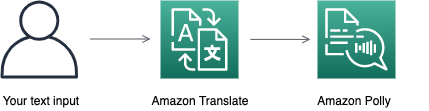

## 1. Set up Amazon Translate

First, set up the Amazon Translate client and call the translate function. 

In [ ]:
import boto3

# Client represents Amazon Translate, and is used for specific functions later on. 
client = boto3.client('translate')

# Calls the translate function. 
response = client.translate_text(
        Text='I am trying out code in AWS.', 
        SourceLanguageCode='en', 
        TargetLanguageCode='fr' 
    )
print(response) #The response variable is the result of the translated text. 



The code outputs the response. 

`TranslatedText` contains the French translation: 'Bienvenue dans mon premier code dans AWS.'

Since response is a dictionary, you can extract the translated text. 

In [ ]:
french_text = response['TranslatedText']
print(french_text)

You can play around with this code by changing different text inputs to the Text parameter. 

## 2. Set Up Amazon Polly

Next, call the Polly service in order to output an audio file of the narrated text.



In [ ]:
# Set up Polly client.
polly_client = boto3.client('polly')


In [ ]:
#The synthesize_speech method takes in text and outputs an audio file. 
polly_response = polly_client.synthesize_speech(Text=french_text, VoiceId='Matthew', OutputFormat='mp3')


## 3. Save Output as Audio

Write the audio into a file called 'polly.mp3.'

In [ ]:
f = open('polly.mp3', 'wb')
#polly_response is a dictionary containing the audio data in the 'AudioStream' key.
f.write(polly_response['AudioStream'].read()) 

Play the translation out loud! Import the `IPython` package to read the audio file. 


In [ ]:
import IPython.display as ipd #Package to read mp3 file 
ipd.Audio('polly.mp3') # Load the saved mp3 file.


If you want to play around with different sentences, go back to the code example where you set up Amazon Translate, change the text input, and rerun the next code examples.

## 4. Close audio stream

Finally, close the audio stream to prevent wasting AWS resources. 

In [ ]:
polly_response['AudioStream'].close()
f.close()

## When you're done

Congratulations on using two AI services together to translate and narrate human language.

In the next module, you will dive into the process of a machine learning problem. You will build a sentiment analyzer for foreign text.

Navigate back to the main folder in JupyterLab. Choose **Module #2**. Then, choose the Jupyter Notebook "#2 Analyze sentiment of foreign text with Amazon Translate and Comprehend" to proceed to the next module. 